In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv('dataset/train.csv')
df.head(2)

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2


In [3]:
df[df.duplicated(keep = False)] 

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


In [4]:
df.set_index('Cust_ID', inplace = True)

In [5]:
df['Wifi'] = df['Wifi'].replace(6,5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [7]:
stats = df.describe()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.T

C:\Users\m13ar\AppData\Local\Temp/ipykernel_16440/2049408207.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats.loc['skew'] = df.skew().tolist()
C:\Users\m13ar\AppData\Local\Temp/ipykernel_16440/2049408207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats.loc['kurt'] = df.kurtosis().tolist()


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0,-0.003847,-0.729800
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0,-0.453779,0.260135
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0,-0.100907,-0.935544
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0,-0.260705,-1.077243
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0,-0.123610,-0.967047
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0,-0.050229,-1.076583
Wifi,15589.0,3.242799,1.323094,0.0,2.0,3.0,4.0,5.0,-0.183010,-1.126262
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0,-0.599498,-0.540657
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0,-0.554561,-0.858889
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0,-0.472074,-0.931811


In [8]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [9]:
df['Year_Birth'].fillna(df['Year_Birth'].mode()[0], inplace=True)
out = df[['Year_Birth','RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]

In [10]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return len(outliers)

In [11]:
detect_outliers_zscore(df.Wifi)

0

In [12]:
outliers = []

for ind, column in enumerate(out.columns):
    z = 0
    z = detect_outliers_zscore(out[column])
    print(ind, column, z, z/len(df)*100)

0 Year_Birth 2 0.012829559304637885
1 RewardPoints 87 0.558085829751748
2 Comfort 0 0.0
3 ReceptionSchedule 0 0.0
4 FoodDrink 0 0.0
5 Location 0 0.0
6 Wifi 0 0.0
7 Amenities 0 0.0
8 Staff 0 0.0
9 OnlineBooking 0 0.0
10 PriceQuality 0 0.0
11 RoomSpace 0 0.0
12 CheckOut 0 0.0
13 Checkin 0 0.0
14 Cleanliness 0 0.0
15 BarService 0 0.0


Text(0.5, 1.0, 'Year_Birth')

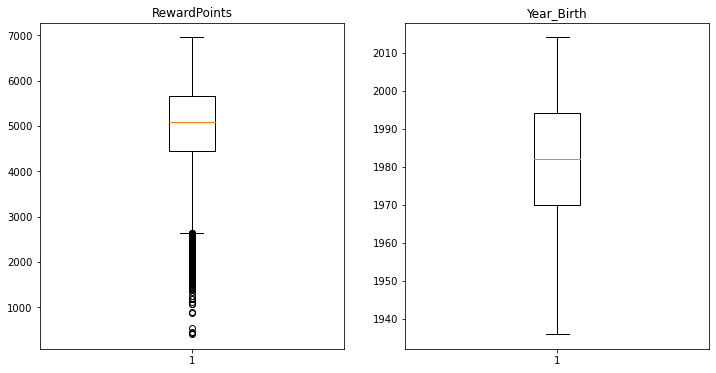

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].boxplot(data = df, x = 'RewardPoints')
axs[0].set_title('RewardPoints')
axs[1].boxplot(data = df, x = 'Year_Birth')
axs[1].set_title('Year_Birth')

In [14]:
outliersIQR = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliersIQR.append(i)
    return len(outliers)
detect_outliers_iqr(df.Year_Birth)


0

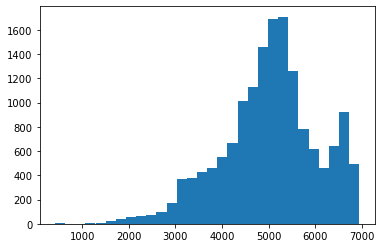

In [15]:
plt.hist(df.RewardPoints, bins = 30)
plt.show()

In [16]:
p1 = np.percentile(df.RewardPoints, 2.5)
c = np.where( df.RewardPoints<p1, p1,  df.RewardPoints)
c

array([4907., 6724., 4365., ..., 4046., 5155., 5136.])

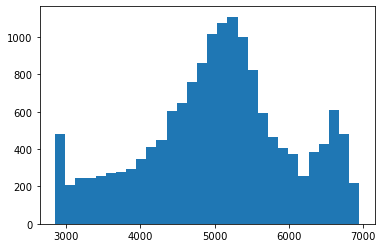

In [17]:
plt.hist(c, bins = 30)
plt.show()

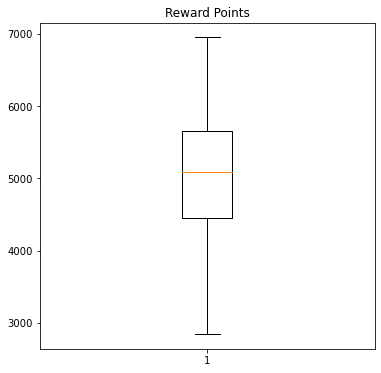

In [18]:
fig = plt.figure(figsize =(6, 6))
plt.boxplot(c)
plt.title("Reward Points")
plt.show()

In [19]:
p1 = np.percentile(df.RewardPoints, 2.5)
d = np.where(df.RewardPoints<p1, df.RewardPoints.median(),  df.RewardPoints)
d

array([4907., 6724., 4365., ..., 4046., 5155., 5136.])

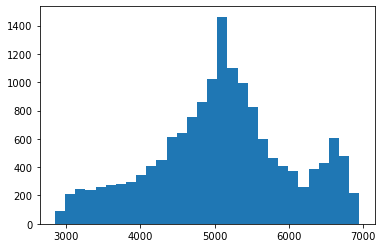

In [20]:
plt.hist(d, bins = 30)
plt.show()

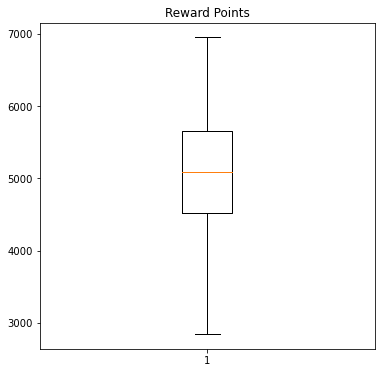

In [21]:
fig = plt.figure(figsize =(6, 6))
plt.boxplot(d)
plt.title("Reward Points")
plt.show()

In [22]:
RP = pd.DataFrame(d)

In [23]:
RP.skew()

0   -0.131391
dtype: float64

In [24]:
 from sklearn.preprocessing import PowerTransformer

In [25]:
pt = PowerTransformer()

In [26]:
print(pt.fit(RP))

PowerTransformer()


In [27]:
print(pt.lambdas_)

[1.21566942]


In [28]:
RP_transf = pt.transform(RP)

In [29]:
RP_sk = pd.DataFrame(RP_transf)

In [30]:
RP_sk.skew()

0   -0.034047
dtype: float64

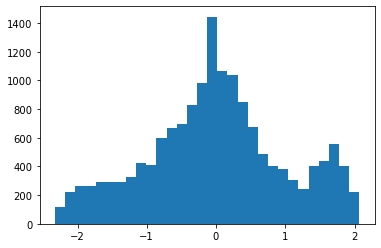

In [31]:
plt.hist(RP_sk, bins = 30)
plt.show()

In [32]:
df["RP"] = RP_sk

In [33]:
df.Churn.value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

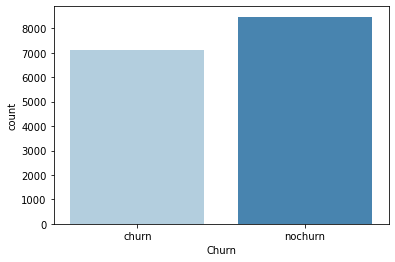

In [34]:
sns.countplot(x="Churn", data = df, palette = "Blues")
plt.show()

In [35]:
nochurn_count = len(df[df['Churn']=='nochurn'])
churn_count = len(df[df['Churn']=='churn'])
nochurn_perc = nochurn_count/len(df)
churn_perc = churn_count/len(df)
print("percentage of no churn is", nochurn_perc)
print("percentage of churn is", churn_perc)


percentage of no churn is 0.5437808711270767
percentage of churn is 0.4562191288729232


In [36]:
df.groupby('Churn').median()

,Year_Birth,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RP
Churn,,,,,,,,,,,,,,,,,
churn,1985.0,5061.5,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,-0.025671
nochurn,1979.0,5124.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,-0.020242


In [37]:
df.Churn.replace({"nochurn": 0, "churn": 1}, inplace = True)

Text(0, 0.5, 'Frequency of Churn')

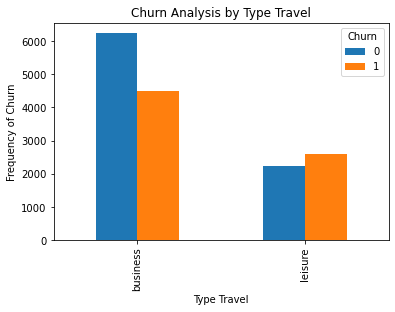

In [38]:
%matplotlib inline
pd.crosstab(df.TypeTravel,df.Churn).plot(kind='bar')
plt.title('Churn Analysis by Type Travel')
plt.xlabel('Type Travel')
plt.ylabel('Frequency of Churn')

Text(0, 0.5, 'Frequency of Churn')

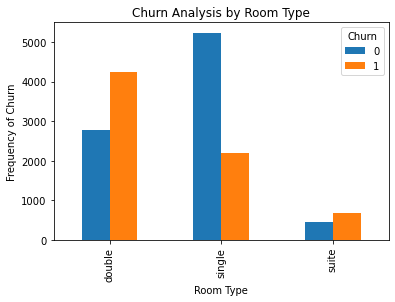

In [39]:
%matplotlib inline
pd.crosstab(df.RoomType,df.Churn).plot(kind='bar')
plt.title('Churn Analysis by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Frequency of Churn')

In [40]:
df['Age_bins'] = pd.cut(df['Year_Birth'], 10, labels=["b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9", "b10"])

Text(0, 0.5, 'Proportion')

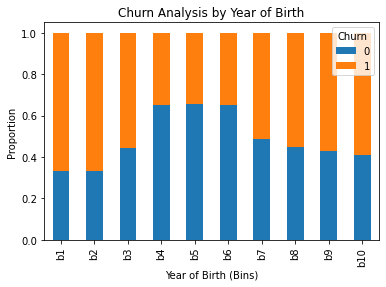

In [41]:
table=pd.crosstab(df.Age_bins,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Year of Birth')
plt.xlabel('Year of Birth (Bins)')
plt.ylabel('Proportion')

In [42]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'RP',
       'Age_bins'],
      dtype='object')

In [43]:
df.Longevity.replace({"y": 1, "yes": 1, "no": 0}, inplace = True)

Text(0.5, 1.0, 'Churn Analysis by Longevity')

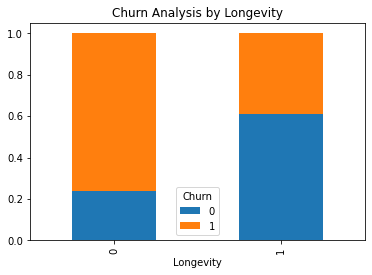

In [44]:
table=pd.crosstab(df.Longevity,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Longevity')


Text(0.5, 1.0, 'Churn Analysis by Longevity')

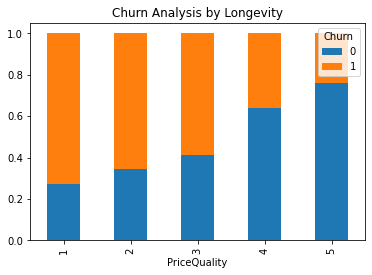

In [45]:
table=pd.crosstab(df.PriceQuality,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Longevity')


Text(0.5, 1.0, 'Churn Analysis by Longevity')

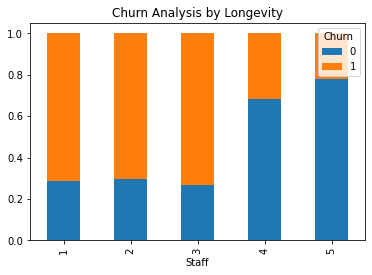

In [46]:
table=pd.crosstab(df.Staff,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Longevity')

Text(0.5, 1.0, 'Churn Analysis by Comfort')

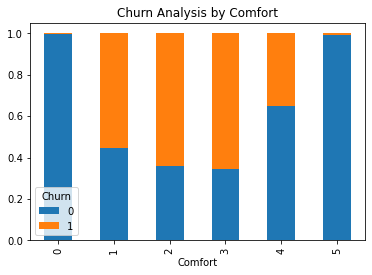

In [47]:
table=pd.crosstab(df.Comfort,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Comfort')

Text(0.5, 1.0, 'Churn Analysis by ReceptionSchedule')

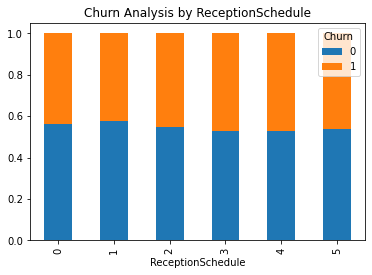

In [48]:
table=pd.crosstab(df.ReceptionSchedule,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by ReceptionSchedule')

Text(0.5, 1.0, 'Churn Analysis by FoodDrink')

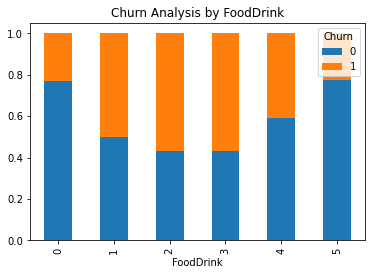

In [49]:
table=pd.crosstab(df.FoodDrink,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by FoodDrink')

Text(0.5, 1.0, 'Churn Analysis by Location')

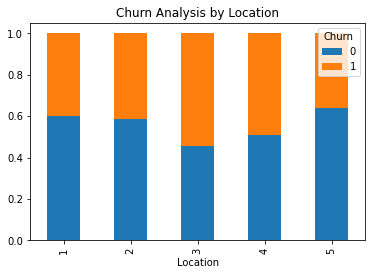

In [50]:
table=pd.crosstab(df.Location,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Location')

Text(0.5, 1.0, 'Churn Analysis by Wifi')

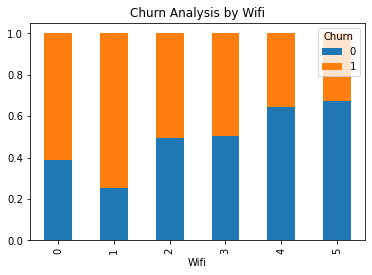

In [51]:
table=pd.crosstab(df.Wifi,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Wifi')

Text(0.5, 1.0, 'Churn Analysis by Amenities')

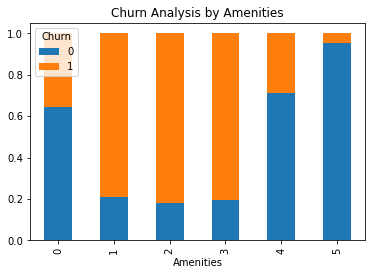

In [52]:
table=pd.crosstab(df.Amenities,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Amenities')

Text(0.5, 1.0, 'Churn Analysis by OnlineBooking')

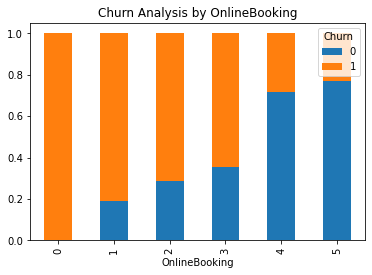

In [53]:
table=pd.crosstab(df.OnlineBooking,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by OnlineBooking')

Text(0.5, 1.0, 'Churn Analysis by RoomSpace')

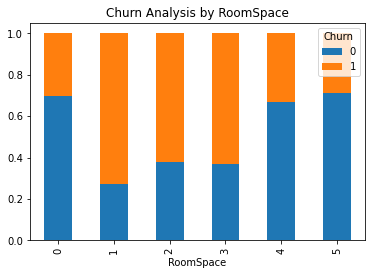

In [54]:
table=pd.crosstab(df.RoomSpace,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by RoomSpace')

Text(0.5, 1.0, 'Churn Analysis by CheckOut')

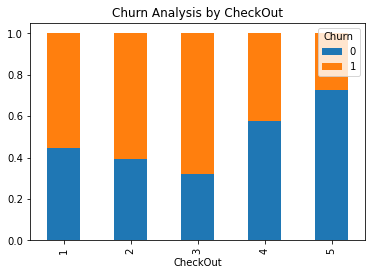

In [55]:
table=pd.crosstab(df.CheckOut,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by CheckOut')

Text(0.5, 1.0, 'Churn Analysis by Checkin')

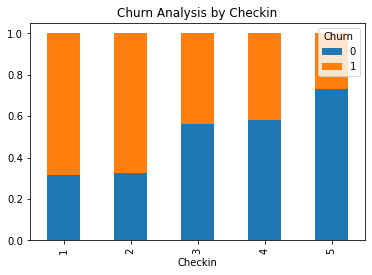

In [56]:
table=pd.crosstab(df.Checkin,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Checkin')

Text(0.5, 1.0, 'Churn Analysis by Cleanliness')

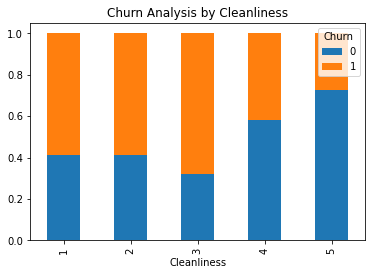

In [57]:
table=pd.crosstab(df.Cleanliness,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Cleanliness')

Text(0.5, 1.0, 'Churn Analysis by BarService')

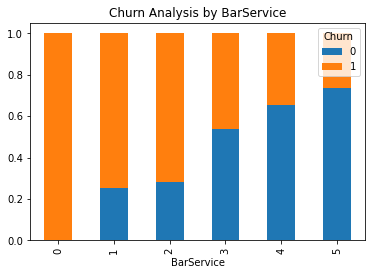

In [58]:
table=pd.crosstab(df.BarService,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by BarService')

In [66]:
df['Points_bins'] = pd.cut(df['RP'], 10, labels=["b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9", "b10"])

Text(0.5, 1.0, 'Churn Analysis by Reward Points')

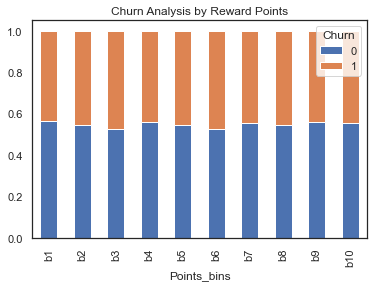

In [67]:
table=pd.crosstab(df.Points_bins,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Analysis by Reward Points')

In [68]:
df['Gender'] = df['Name'].str.split('. ', expand = True)[0]

In [69]:
df['Gender'].replace({'Ms':1, 'Mr':0}, inplace=True)

Text(0, 0.5, 'Frequency of Churn')

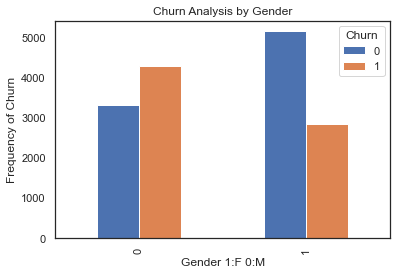

In [70]:
%matplotlib inline
pd.crosstab(df.Gender,df.Churn).plot(kind='bar')
plt.title('Churn Analysis by Gender')
plt.xlabel('Gender 1:F 0:M')
plt.ylabel('Frequency of Churn')

In [119]:
df.columns

Index(['Churn', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'RP',
       'Gender'],
      dtype='object')

In [121]:
df['TypeTravel'].replace({'leisure':1, 'business':0}, inplace=True)

In [124]:
df.drop(columns=['Name', 'Age_bins', 'Points_bins'], inplace=True)

In [125]:
data = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [126]:
data.columns

Index(['Churn', 'Longevity', 'Year_Birth', 'TypeTravel', 'RewardPoints',
       'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'RP', 'Gender',
       'RoomType_single', 'RoomType_suite'],
      dtype='object')

C:\Users\m13ar\AppData\Local\Temp/ipykernel_16440/960872760.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array


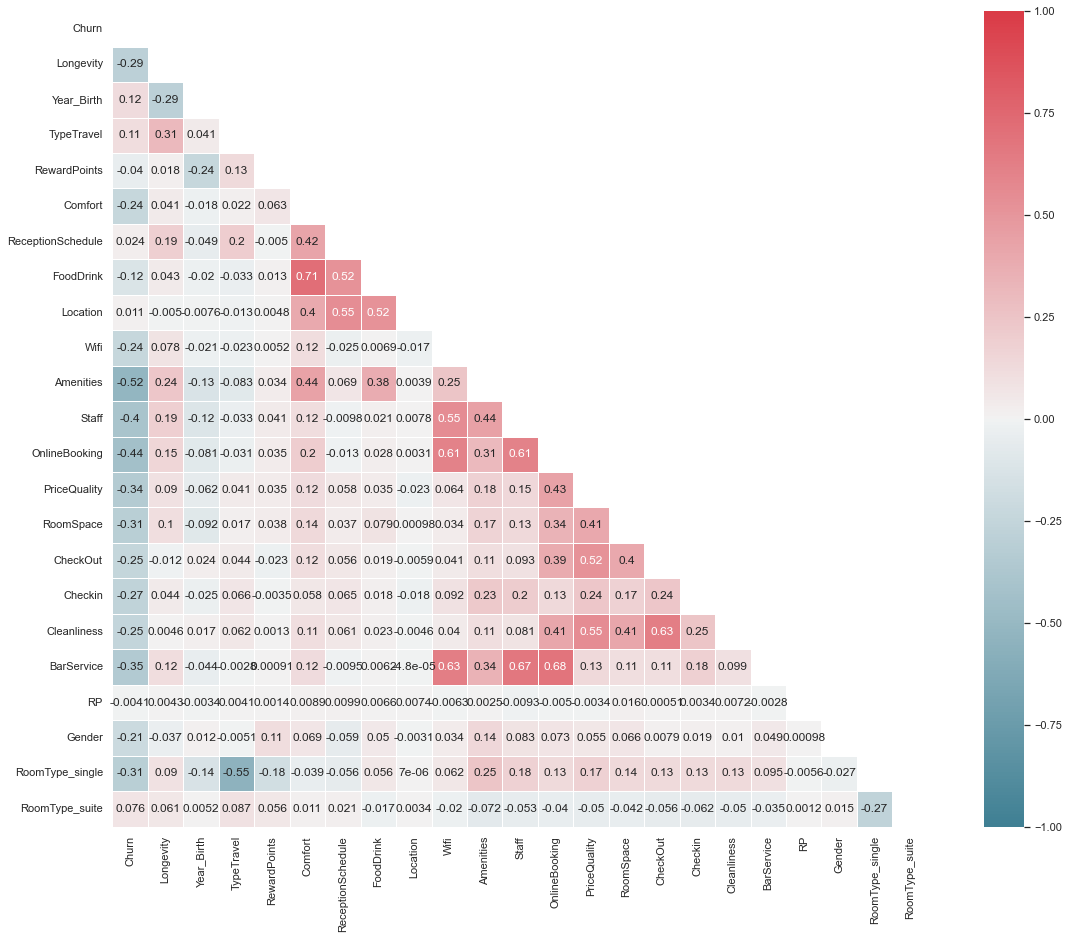

In [127]:
sns.set(style="white")
corr = data.corr(method= "pearson") 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True,annot=True, linewidths=.5,vmin = -1, vmax = 1, ax=ax)

plt.show()      

**Summary notes:**
- `Churn` is most correlated with `Amenities`, `OnlineBooking`, `Staff`, `BarService`, `PriceQuality`, `RoomSpace`, `RoomType`, `Longevity`

In [131]:
x = data.drop(columns = "Churn")
x.columns

Index(['Longevity', 'Year_Birth', 'TypeTravel', 'RewardPoints', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'RP', 'Gender',
       'RoomType_single', 'RoomType_suite'],
      dtype='object')

C:\Users\m13ar\AppData\Local\Temp/ipykernel_16440/1304295159.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array


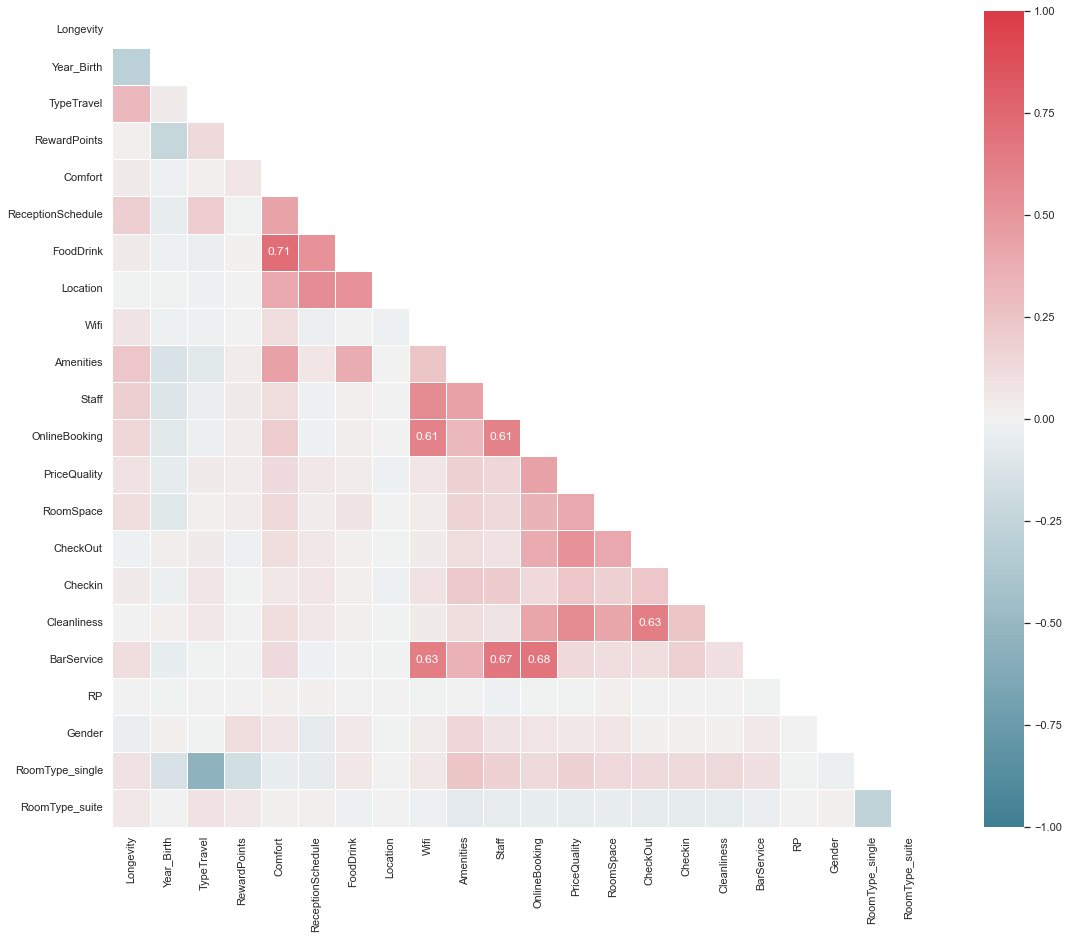

In [132]:
sns.set(style="white")
corr = x.corr(method= "pearson") 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True,annot=True, linewidths=.5,vmin = -1, vmax = 1, ax=ax)


for t in ax.texts:
    if float(t.get_text())>=0.6 or float(t.get_text())<-0.6:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text



plt.show()      

**Summary notes:**
- `Churn` is most correlated with `Amenities`, `OnlineBooking`, `Staff`, `BarService`, `PriceQuality`, `RoomSpace`, `RoomType`, `Longevity`
- Keep `Amenities`, `OnlineBooking`, `Staff`, `PriceQuality`, `RoomSpace`, `RoomType`, `Longevity`